In this notebook we make linear models for four clusters with unimodal fire season and a high correlation with one climate index.

We use the functions defined in the file "scripts/lm_modelling_functions.R".

In [1]:
setwd("..")
source("scripts/lm_modelling_functions.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews(

Loading objects:
  fireSeasonPer75_def
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  df_masked
  masked_coords
Loading objects:
  corr.df


## Climate indexes data loading

In [2]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [3]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [4]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [5]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [6]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [7]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [8]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [9]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

## Resultados antiguos obtenidos con el fichero "modelling_functions.R"

For comparison reasons only

In [27]:
# Clusters that have a linear and a random forest models
table[-which(is.na(table$lm.R2)),]

,biome,cluster,lm.Npred,lm.RMSE,lm.R2,lm.MAE,lm.RVar,lm.Rp90,rf.mtry,rf.ntree,rf.RMSE,rf.R2,rf.MAE,rf.RVar,rf.Rp90
2,1,1,1,611.61022,0.119517294,446.309525,0.2659278,0.9799070,3,120,613.53071,0.1080653203,437.72265,0.13715055,0.9580862
7,1,6,1,2287.72216,0.199140791,1922.040622,0.3417525,0.9410253,3,120,2495.73945,0.0467549373,2139.97293,0.11026688,0.9018471
8,1,7,1,1098.47171,0.160623473,821.374171,0.3450909,0.9458061,3,40,1247.20621,0.0052878637,955.87381,0.08683104,0.8882295
11,1,10,2,2153.29564,0.188631116,1712.160375,0.4794496,0.9030738,3,40,2307.40524,0.0361566009,1920.77901,0.15056784,0.8833276
14,1,13,1,1395.62517,0.157195659,1151.452524,0.3111555,0.9036550,3,60,1538.52195,0.0036762246,1253.07172,0.09101707,0.8504334
16,2,1,1,417.28199,0.132097699,349.018858,0.3405630,0.9187229,3,100,397.41201,0.1736627318,321.72542,0.12131651,0.8896367
18,2,3,1,538.21883,0.208572669,426.552563,0.3490131,0.9363016,3,120,572.71706,0.0853524548,488.10072,0.12179957,0.9081988
19,2,4,1,963.46153,0.120135067,737.258396,0.2492008,0.9459738,3,160,1091.45764,0.0093936633,885.88231,0.09547201,0.9247957
20,2,5,1,880.00026,0.254900974,697.186375,0.3998817,0.9193728,3,60,1019.11700,0.0211587452,838.76285,0.12257111,0.8991184
21,2,6,1,879.21591,0.177848086,728.289025,0.3068498,0.7807753,3,40,1007.19063,0.0064315666,827.50847,0.16746662,0.7875102


## Biome 2, cluster 4

This one has a significant correlation of -0.5 with the 'ea' index. Red points are the predicted ones.

Correlated indexes: 4 
        RMSE         R2      RVar      Rp90
90% 963.4615 0.09614867 0.2492008 0.9459738


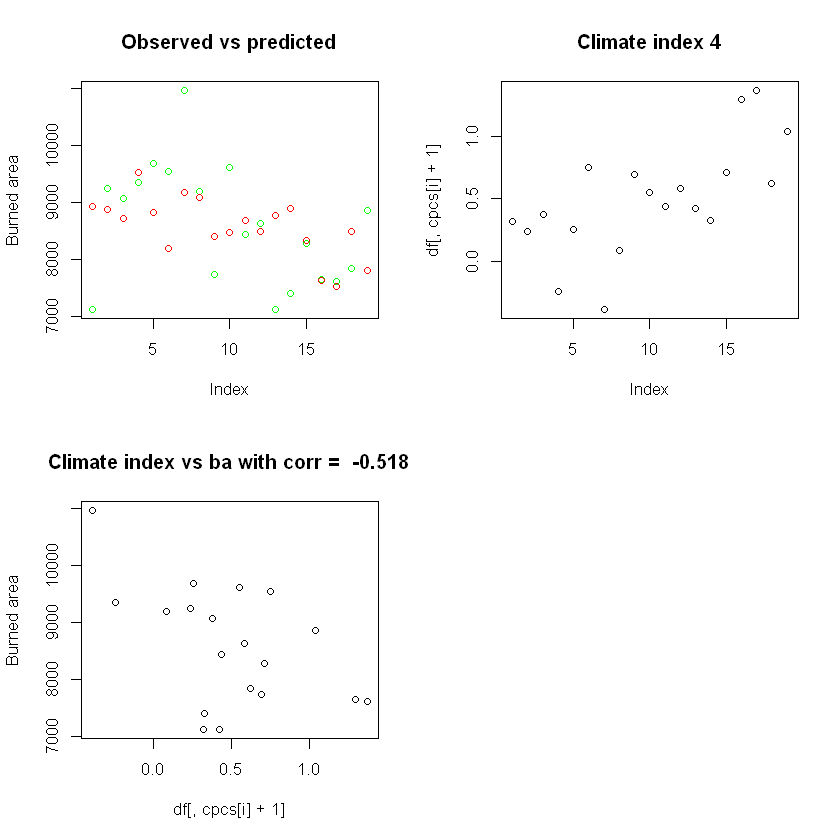

In [102]:
t = lm.clus(fireSeasonPer75_def, log1p(masked_ba_series), corr.df, list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 2, 4)

## Biome 2, cluster 3

This one has a significant correlation of 0.6 with the 'pna' index. Red points are the predicted ones.

Correlated indexes: 6 
        RMSE        R2      RVar      Rp90
90% 538.2188 0.1892671 0.3490131 0.9363016


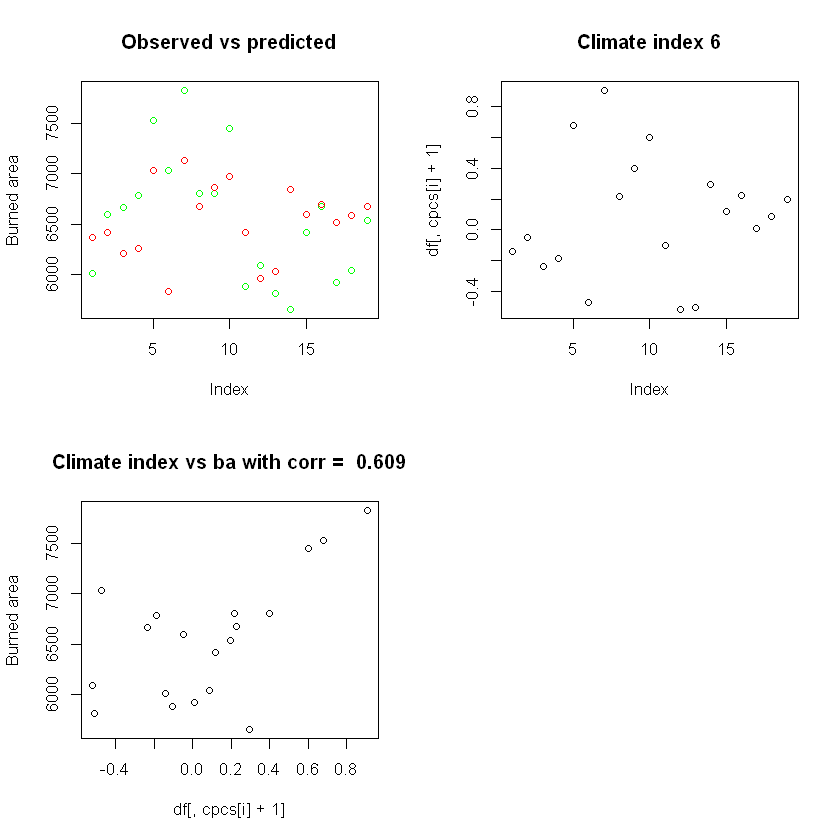

In [103]:
t = lm.clus(fireSeasonPer75_def, log1p(masked_ba_series), corr.df, list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 2, 3)

## Biome 11, cluster 31

This one has a significant correlation of -0.6 with the 'eawr' index. Red points are the predicted ones.

Correlated indexes: 5 
        RMSE        R2      RVar      Rp90
90% 12.98979 0.2343673 0.4164586 0.7910344


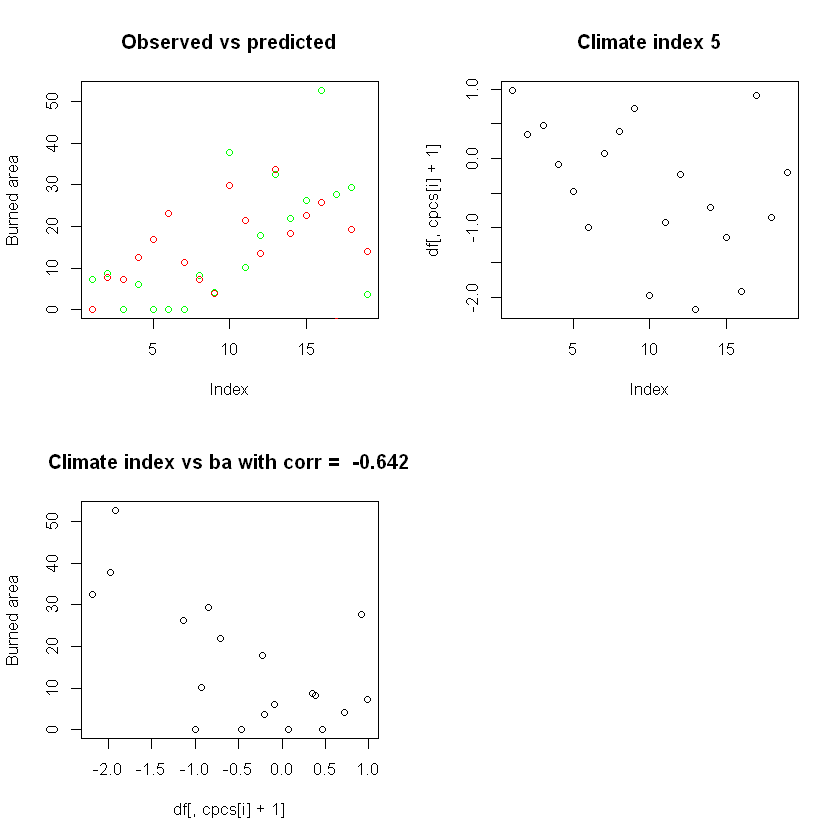

In [104]:
t = lm.clus(fireSeasonPer75_def, log1p(masked_ba_series), corr.df, list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 11, 31)

## Biome 5, cluster 1

This one has a significant correlation of -0.65 with the 'nina34' index. Red points are the predicted ones.

Correlated indexes: 1 
        RMSE        R2      RVar      Rp90
90% 189.0145 0.2742782 0.5018555 0.9281543


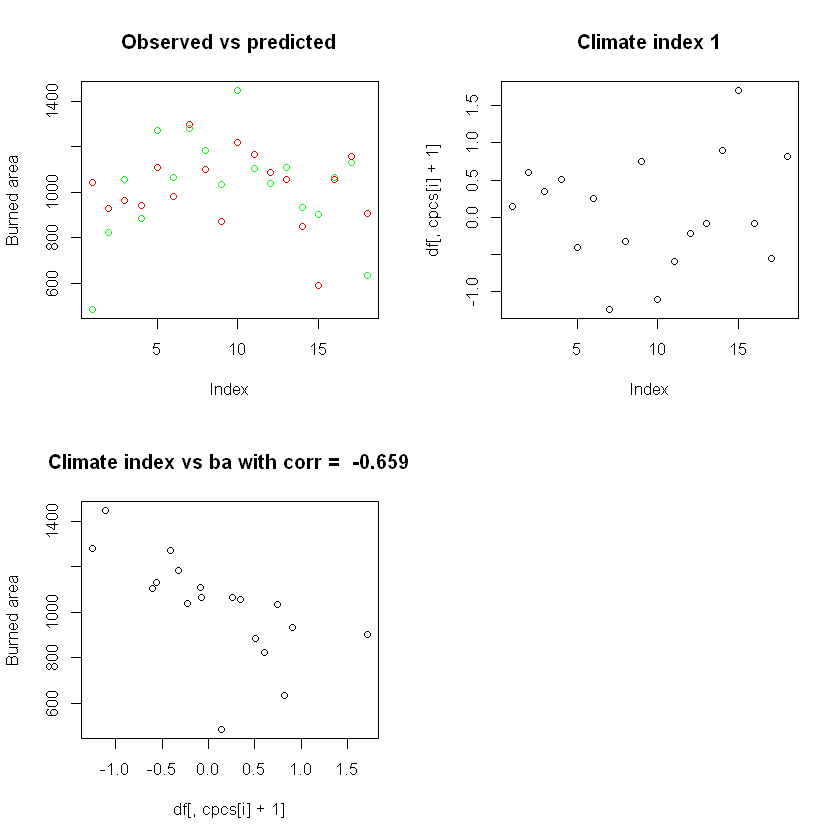

In [106]:
t = lm.clus(fireSeasonPer75_def, log1p(masked_ba_series), corr.df, list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 5, 1)